In [1]:
import xml_utils as xml_frf
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# rules for pairs of keypoints to draw a line between, and the line color to use.
keypoint_connection_rules = [
    # face
    ("left_ear", "left_eye", (102, 204, 255)),
    ("right_ear", "right_eye", (51, 153, 255)),
    ("left_eye", "nose", (102, 0, 204)),
    ("nose", "right_eye", (51, 102, 255)),
    # upper-body
    ("left_shoulder", "right_shoulder", (255, 128, 0)),
    ("left_shoulder", "left_elbow", (153, 255, 204)),
    ("right_shoulder", "right_elbow", (128, 229, 255)),
    ("left_elbow", "left_wrist", (153, 255, 153)),
    ("right_elbow", "right_wrist", (102, 255, 224)),
    # lower-body
    ("left_hip", "right_hip", (255, 102, 0)),
    ("left_hip", "left_knee", (255, 255, 77)),
    ("right_hip", "right_knee", (153, 255, 204)),
    ("left_knee", "left_ankle", (191, 255, 128)),
    ("right_knee", "right_ankle", (255, 195, 77)),
]

keypoint_names = (
    "nose",
    "left_eye", "right_eye",
    "left_ear", "right_ear",
    "left_shoulder", "right_shoulder",
    "left_elbow", "right_elbow",
    "left_wrist", "right_wrist",
    "left_hip", "right_hip",
    "left_knee", "right_knee",
    "left_ankle", "right_ankle",
)

In [3]:
    _KEYPOINT_THRESHOLD = 3

    def draw_and_connect_keypoints(img, keypoints):
        """
        Draws keypoints of an instance and follows the rules for keypoint connections
        to draw lines between appropriate keypoints. This follows color heuristics for
        line color.
        Args:
            keypoints: an array of shape (K, 3), where K is the number of keypoints
                and the last dimension corresponds to (x, y, probability).
        Returns:
            res_img: image object with visualizations.
        """
        visible = {}
        res_img = img # img.copy()
        
        for idx, keypoint in enumerate(keypoints):
            # draw keypoint
            x = keypoint[0].astype(int)
            y = keypoint[1].astype(int)
            prob = (keypoint[2]*100).astype(int) 
    
            if prob > _KEYPOINT_THRESHOLD:
                #self.draw_circle((x, y), color=_RED)
                res_img = cv2.circle(res_img, (x, y), 5, (255, 0, 0), -1)
                if keypoint_names:
                    keypoint_name = keypoint_names[idx]
                    visible[keypoint_name] = (x, y)

        #print(visible)
        for kp0, kp1, color in keypoint_connection_rules:
            if kp0 in visible and kp1 in visible:
                x0, y0 = visible[kp0]
                x1, y1 = visible[kp1]
                #color = (0,0,0)
                thickness = 3
                res_img = cv2.line(res_img, (x0, y0), (x1, y1), color, thickness) 

        # draw lines from nose to mid-shoulder and mid-shoulder to mid-hip
        # Note that this strategy is specific to person keypoints.
        # For other keypoints, it should just do nothing
        try:
            ls_x, ls_y = visible["left_shoulder"]
            rs_x, rs_y = visible["right_shoulder"]
            mid_shoulder_x, mid_shoulder_y = int((ls_x + rs_x) / 2), int((ls_y + rs_y) / 2)
        except KeyError:
            pass
        else:
            # draw line from nose to mid-shoulder
            nose_x, nose_y = visible.get("nose", (None, None))
            if nose_x is not None:
                res_img = cv2.line(res_img, (nose_x, nose_y), (mid_shoulder_x, mid_shoulder_y), (255, 255, 255), thickness) 

            try:
                # draw line from mid-shoulder to mid-hip
                lh_x, lh_y = visible["left_hip"]
                rh_x, rh_y = visible["right_hip"]
            except KeyError:
                pass
            else:
                mid_hip_x, mid_hip_y = int((lh_x + rh_x) / 2), int((lh_y + rh_y) / 2)
                res_img = cv2.line(res_img, (mid_hip_x, mid_hip_y), (mid_shoulder_x, mid_shoulder_y), (255, 0, 0), thickness) 

        return res_img

## with an image

In [4]:
a = xml_frf.XML_data('im1.xml')

In [5]:
img_file = 'im1.jpeg'

In [6]:
img, patch = a.draw_image_instances(img_file)

Relative position in scene: [ 246.5  152.5]


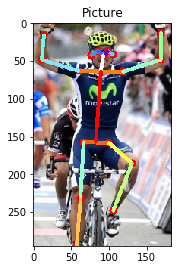

Relative position in scene: [ 144.   156.5]


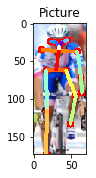

In [8]:
# Each instance patch

i=0
p = draw_and_connect_keypoints(patch['instances']['images'][i].copy(), patch['instances']['keypoints'][i])
print('Relative position in scene:', patch['instances']['relative_position'][i])
height, width, depth = p.shape
dpi = plt.rcParams['figure.dpi']
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)

plt.imshow(p)
plt.title('Picture')
plt.show()




i=1
p = draw_and_connect_keypoints(patch['instances']['images'][i].copy(), patch['instances']['keypoints'][i])
print('Relative position in scene:', patch['instances']['relative_position'][i])
height, width, depth = p.shape
dpi = plt.rcParams['figure.dpi']
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)

plt.imshow(p)
plt.title('Picture')
plt.show()

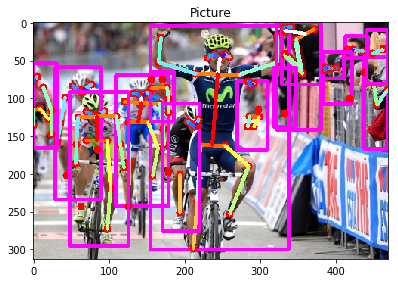

In [9]:
# All instances
height, width, depth = img.shape
dpi = plt.rcParams['figure.dpi']
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)

plt.imshow(img)
plt.title('Picture')
plt.show()

## with a video

In [10]:
a = xml_frf.XML_data('no1_xvid.xml')

In [11]:
vid_file = 'no1_xvid.mp4'
out_vid = 'out_vid.mp4'

In [12]:
patch = a.draw_video_instances(vid_file, out_vid)

### Each instance patch

In [13]:
def print_frame(frame, patch):
    for idx in range(0, len(patch[frame]['Patches']['images'])):
        img = patch[frame]['Patches']['images'][idx]
        kp = patch[frame]['Patches']['keypoints'][idx]
        rp = patch[frame]['Patches']['relative_position'][idx]
        
        p = draw_and_connect_keypoints(img.copy(), kp)
        print('--------------')
        print('Relative position in scene:', rp)
        height, width, depth = p.shape
        dpi = plt.rcParams['figure.dpi']
        figsize = width / float(dpi), height / float(dpi)
        plt.figure(figsize=figsize)

        plt.imshow(p)
        plt.title('Picture')
        plt.show()

--------------
Relative position in scene: [ 276.   104.5]


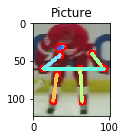

--------------
Relative position in scene: [ 166.   89.]


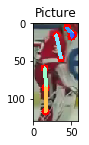

In [14]:
print_frame(0, patch)

--------------
Relative position in scene: [ 200.   89.]


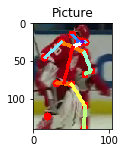

--------------
Relative position in scene: [ 223.5   77. ]


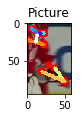

In [15]:
print_frame(16, patch)

--------------
Relative position in scene: [ 186.5   86. ]


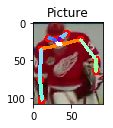

--------------
Relative position in scene: [  81.   152.5]


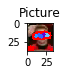

--------------
Relative position in scene: [ 70.5  83. ]


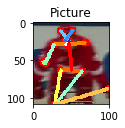

In [16]:
print_frame(35, patch)